In [80]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#Loading the  reuters newspaper data

from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)


In [82]:
train_data.shape

(8982,)

In [83]:
train_data[0] #all the words are convereted to number

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [84]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

decoded_newswire=' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [85]:
train_labels[0]

3

In [86]:
#Data preparation

def vectorize_sequence(sequences, dimension=10000):

  results=np.zeros((len(sequences),dimension))

  for i,sequence in enumerate(sequences):
    results[i,sequence]=1

  return results

#changing the data

x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [87]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [88]:
#encoding the label data

def to_one_hot(labels, dimension=46):  #46 is the number of topic pregiven
  results=np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i,sequence]=1
  return results


one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)


In [89]:
#Changing to categorical data

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [90]:
#artifical neural network 

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) #last layer should be the same as the topic 

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                640064    
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
# preparation of the test data

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [94]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 2.4611 - accuracy: 0.5519 - val_loss: 1.6448 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 1.3589 - accuracy: 0.7053 - val_loss: 1.2823 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.0159 - accuracy: 0.7676 - val_loss: 1.1170 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.7992 - accuracy: 0.8252 - val_loss: 1.0394 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6397 - accuracy: 0.8641 - val_loss: 0.9414 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5125 - accuracy: 0.8949 - val_loss: 0.9173 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 58ms/step - loss: 0.4142 - accuracy: 0.9157 - val_loss: 0.8946 - val_accuracy: 0.8130
Epoch 8/20
16

In [95]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(1,len(loss)+1)

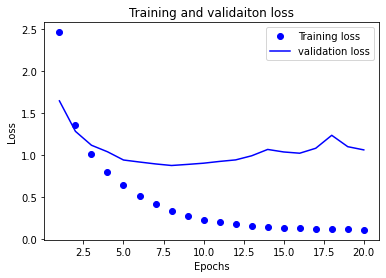

In [96]:
#visualizing the results

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b-',label='validation loss')
plt.title('Training and validaiton loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

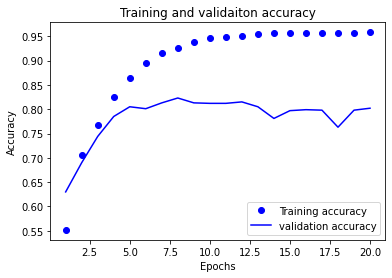

In [97]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b-',label='validation accuracy')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()